In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('My project/customer_support_tickets.csv')
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [4]:
data.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [5]:
data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [6]:
data.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8464    False
8465    False
8466    False
8467    False
8468    False
Length: 8469, dtype: bool>

In [7]:
data.drop_duplicates(inplace=True)

<Axes: title={'center': 'Customer Satisfaction Distribution'}, xlabel='Customer Satisfaction Rating'>

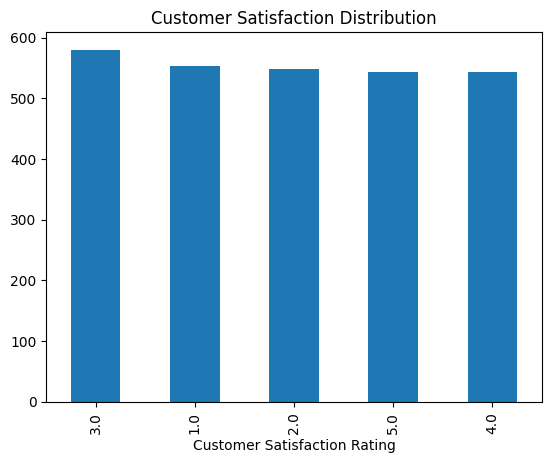

In [8]:
data['Customer Satisfaction Rating'].value_counts().plot(kind='bar',title='Customer Satisfaction Distribution')


array([[<Axes: title={'center': 'Ticket ID'}>,
        <Axes: title={'center': 'Customer Age'}>],
       [<Axes: title={'center': 'Customer Satisfaction Rating'}>,
        <Axes: >]], dtype=object)

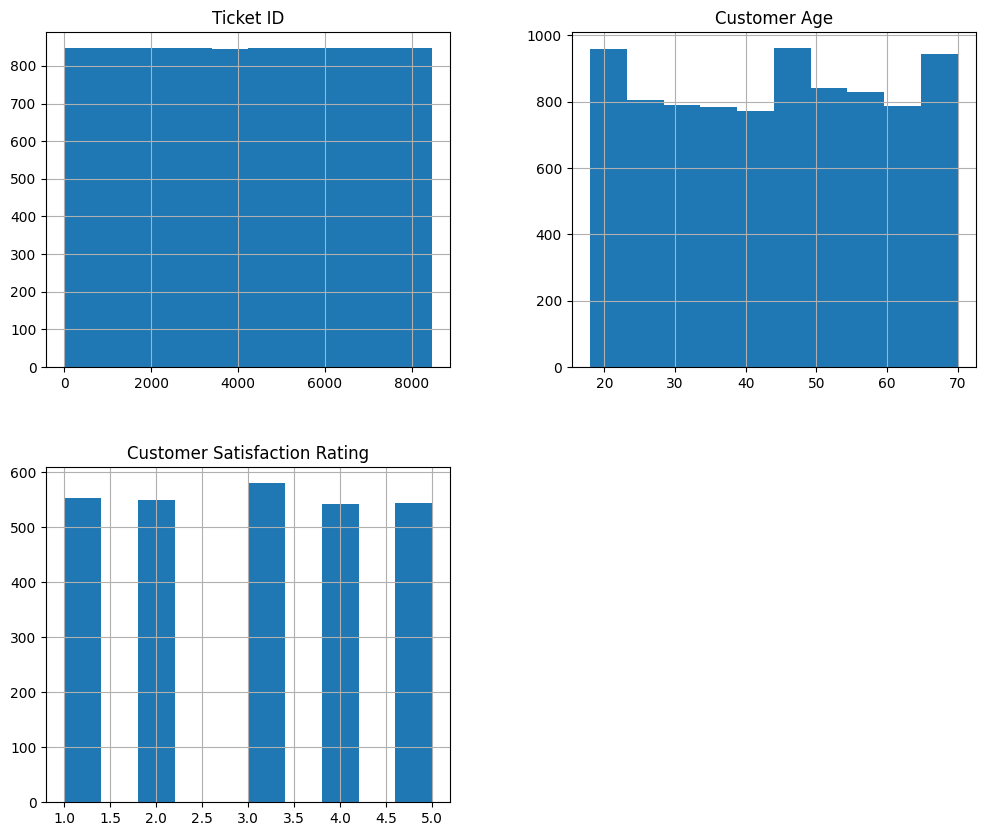

In [9]:
data.hist(figsize=(12,10))

<Axes: xlabel='Customer Satisfaction Rating', ylabel='Customer Age'>

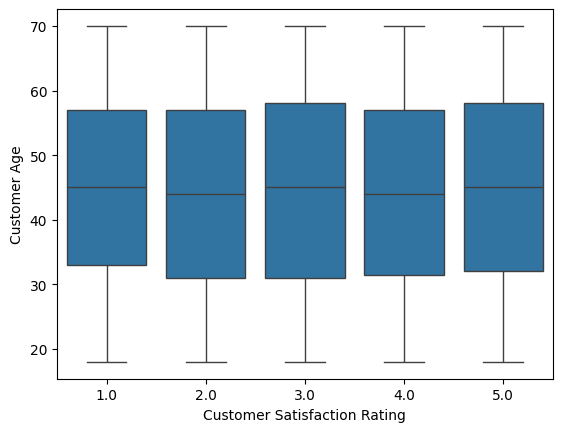

In [10]:
sns.boxplot(x='Customer Satisfaction Rating',y='Customer Age',data=data)

<Axes: xlabel='Product Purchased', ylabel='count'>

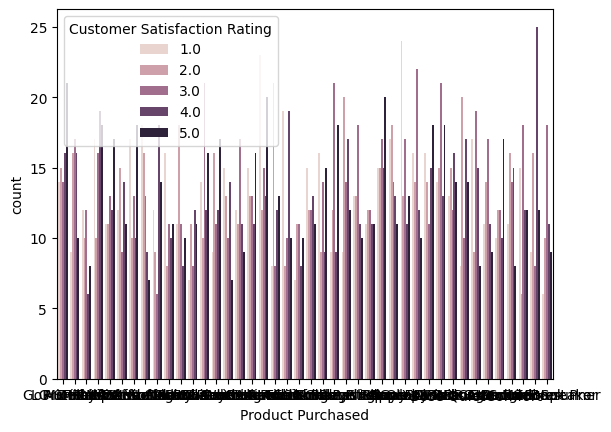

In [11]:
sns.countplot(x='Product Purchased',hue='Customer Satisfaction Rating',data=data)

In [12]:
data.drop(['Ticket ID'],axis=1,inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Product Purchased']=label.fit_transform(data['Product Purchased'])

In [14]:
data=pd.get_dummies(data,drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
x=data.drop('Customer Satisfaction Rating',axis=1)
y=data['Customer Satisfaction Rating']
y=y.fillna(y.mode()[0])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.7502951593860685


C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

         1.0       0.16      0.10      0.12        94
         2.0       0.17      0.01      0.02       108
         3.0       0.78      0.99      0.87      1271
         4.0       0.42      0.05      0.09       100
         5.0       0.00      0.00      0.00       121

    accuracy                           0.75      1694
   macro avg       0.30      0.23      0.22      1694
weighted avg       0.63      0.75      0.66      1694

[[   9    1   83    1    0]
 [  15    1   90    2    0]
 [  13    0 1256    2    0]
 [   8    3   84    5    0]
 [  11    1  107    2    0]]


In [18]:
import joblib
joblib.dump(model,"Customer_Satisfaction_Model.pkl")

['Customer_Satisfaction_Model.pkl']